# Fitting a resonator measured in reflection

In [ ]:
## Make better way of importing the individual function (This not a very good way)
%cd D:\Github\rf-analysis-tools\src\resonator
#%cd C:\Users\DebopamDatta\Documents\Softwares\rf-analysis-tools\src

In [ ]:

from resonator import circuit
import numpy as np
import pandas as pd
from IPython.display import display
import numpy as np
import xarray as xr
import holoviews as hv
import os
from qcodes import initialise_or_create_database_at, load_by_run_spec, initialised_database_at
import pandas as pd
import qcodes as qc

## Database file reading

#### Although we could use the resonator tools to load data, here we want to use the Pandas library, which is used for statistical data analysis. It can handle many different file types including hdf5.

In [ ]:
db_address = "C:\\Users\\DebopamDatta\\Documents\\c12_data"
cooldown_date = "2025-09-12" 
database_file_name = "2025-09-12-C12-036-E-C12-036-C.db"
initialise_or_create_database_at(os.path.join(db_address,cooldown_date,database_file_name))
print(os.path.join(db_address,cooldown_date,database_file_name))
# peak1 = load_by_run_spec(captured_run_id=2).to_xarray_dataset()

In [ ]:
peak1 = load_by_run_spec(captured_run_id=24).to_xarray_dataset().sel({'pna_power':-40})

Pandas has a very nice way of displaying the data. Let's look at the first few entries:

In [ ]:
display(peak1.head())

Next, we define a reflection port measurement and add the data.

In [ ]:
# port2 = circuit.reflection_port(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data_raw=10**(
#     np.log10(((peak1["R"].values / np.sqrt(2)) ** 2 * 1000) / 50))
#     * np.exp(1j * np.pi * peak1["Phi"] / 180),
# )
# port2 = circuit.reflection_port(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data_raw=peak1["R"]/2
#         * np.exp(1j * np.pi * peak1["Phi"] / 180),
# )

# # port2 = circuit.reflection_port(
# #     f_data=peak1["readoutpulsefrequency"].values,
# #     z_data_raw=peak1["I"].values - 1j * peak1["Q"].values,
# # )
# # hv.Curve((peak1["I"].values, peak1["Q"].values), kdims=["I"], vdims=["Q"])
# hv.Curve(
#     (peak1["readoutpulsefrequency"].values, 10 * np.log10((((peak1["R"].values / np.sqrt(2)) ** 2) * 1000) / 50)),
#     kdims=["readoutpulsefrequency"], vdims=["Power (dBm)"]
# )

In [ ]:
port2 = circuit.reflection_port(
    f_data=peak1["pna_frequency_axis"],
    z_data_raw=peak1["pna_tr1_linear_magnitude"]
    * np.exp(1j * np.pi * peak1["pna_tr1_unwrapped_phase"] / 180),
)

In [ ]:
# hv.Curve((peak1["I"].values, peak1["Q"].values), kdims=["I"], vdims=["Q"])

Perform an automated fit.

In [ ]:
port2.autofit()

Let's plot the data and the fit!

In [ ]:
port2.plotall()

In [ ]:
port2.plotrawdata()

In [ ]:
# port2.circlefit(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data=peak1["I"].values - 1j * peak1["Q"].values,
# )

In [ ]:
port2.GUIfit()

In [ ]:
port2.plotall()

In [ ]:
display(pd.DataFrame([port2.fitresults]).map(lambda x: "{0:.2e}".format(x)))

In [ ]:
print("Single photon limit: %.2f dBm" % port2.get_single_photon_limit())

In [ ]:
print(
    "At -100dBm, we have %.2e photons in the resonator"
    % port2.get_photons_in_resonator(-100)
)

In [ ]:
initialise_or_create_database_at(
    r"D:\Github\Qinu\qumin\data\2025-08-29-C12-036-J-C12-037-AA.db"
)
# pea

In [ ]:
db_address = r"D:\Github\Qinu\qumin\data"
cooldown_date = "2025-07-25"
database_file_name = "2025-09-15-C12-033-O-singlecavities.db"
initialise_or_create_database_at(os.path.join(db_address,database_file_name))
print(os.path.join(db_address,database_file_name))

In [ ]:
# port3 = circuit.notch_port(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data_raw=peak1["I"].values - 1j * peak1["Q"].values,
# )
# print()
# port3 = circuit.notch_port(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data_raw=peak1["R"].values 
#     * np.exp(1j * np.pi * peak1["Phi"] / 180),
# )
peak1 = load_by_run_spec(captured_run_id=24).to_xarray_dataset().sel({'pna_power':-35})

In [16]:
port3 = circuit.notch_port(
    f_data=peak1["pna_frequency_axis"],
    z_data_raw=peak1["pna_tr1_linear_magnitude"]
    * np.exp(1j * np.pi * peak1["pna_tr1_unwrapped_phase"] / 180),
)

In [17]:
port3.autofit()

In [ ]:
# port3.circlefit(
#  f_data=peak1["readoutpulsefrequency"].values ,
#  z_data=peak1["I"].values - 1j * peak1["Q"].values,
# fr=None,Ql=None,refine_results=True,calc_errors=True)


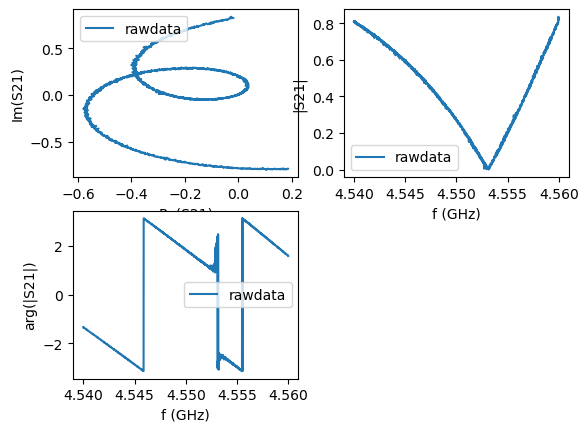

In [18]:
 # port3.do_calibration(
 #     f_data=peak1["readoutpulsefrequency"].values,
 #     z_data=peak1["I"].values - 1j * peak1["Q"].values,
 # )
port3.plotrawdata()

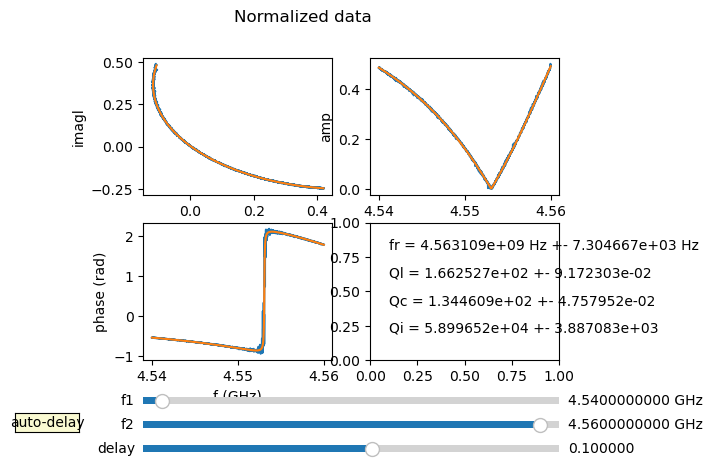

In [19]:
port3.GUIfit()

In [ ]:
port3.plotall()

In [ ]:
port3.plotrawdata()

Next, let us have a look at the fit results. Here, we convert the dictionary of results into a dataframe to display it in a nicer way.

In [ ]:
display(pd.DataFrame([port3.fitresults]).map(lambda x: "{0:.2e}".format(x)))

In [ ]:
print("Single photon limit: %.2f dBm" % port3.get_single_photon_limit())

In [ ]:
print(
    "At -120dBm, we have %.2e photons in the resonator"
    % port3.get_photons_in_resonator(-120)
)